## Data Loading and Labeling

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

In [3]:
true_df["label"] = 1
fake_df["label"] = 0


In [5]:
# Combine datasets
data = pd.concat([true_df, fake_df], axis=0)

In [6]:
# Shuffle dataset
data = data.sample(frac=1).reset_index(drop=True)

In [7]:
print(data.shape)

(44898, 5)


In [8]:
print(data["label"].value_counts())
data.head()

label
0    23481
1    21417
Name: count, dtype: int64


,title,text,subject,date,label
0,TRUMP RESPONSE TO LEFTIST THREATS: “Get Off My...,It s actually quite refreshing to see someone ...,politics,"Jun 27, 2015",0
1,Australian MP resigns over dual nationality in...,SYDNEY (Reuters) - Australia s Prime Minister ...,worldnews,"November 11, 2017",1
2,Seinfeld’s ‘Elaine’ Wants Bernie Sanders To C...,If you watched the most recent Democratic deba...,News,"April 17, 2016",0
3,Suspected Indonesian radicals armed with bows ...,JAKARTA (Reuters) - Indonesian police shot dea...,worldnews,"November 13, 2017",1
4,Zimbabwe opposition wants inclusive political ...,HARARE (Reuters) - Zimbabwe s main opposition ...,worldnews,"November 20, 2017",1


## 2. Understand the Data
● Check for missing/null values. \n
● Inspect a few rows of fake and true news.\n
● Review the distribution of labels.

In [9]:
# Check missing values
print(data.isnull().sum())


title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [10]:
print(data[data['label']==0].head(2))

                                               title  \
0  TRUMP RESPONSE TO LEFTIST THREATS: “Get Off My...   
2   Seinfeld’s ‘Elaine’ Wants Bernie Sanders To C...   

                                                text   subject  \
0  It s actually quite refreshing to see someone ...  politics   
2  If you watched the most recent Democratic deba...      News   

             date  label  
0    Jun 27, 2015      0  
2  April 17, 2016      0  


In [11]:
print(data[data['label']==1].head(2))

                                               title  \
1  Australian MP resigns over dual nationality in...   
3  Suspected Indonesian radicals armed with bows ...   

                                                text    subject  \
1  SYDNEY (Reuters) - Australia s Prime Minister ...  worldnews   
3  JAKARTA (Reuters) - Indonesian police shot dea...  worldnews   

                 date  label  
1  November 11, 2017       1  
3  November 13, 2017       1  


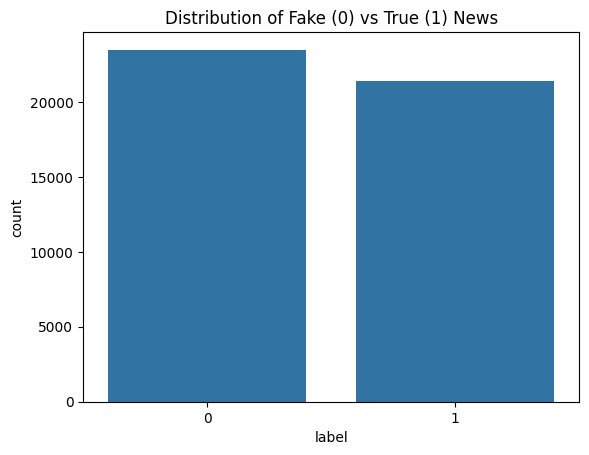

In [14]:
sns.countplot(x="label", data=data)
plt.title("Distribution of Fake (0) vs True (1) News")
plt.show()

## Data Cleaning & Preprocessing

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [16]:
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omrau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omrau\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [18]:
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation & numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize and remove stopwords
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

In [19]:
data["clean_content"] = data["text"].apply(clean_text)
data.head(3)

,title,text,subject,date,label,clean_content
0,TRUMP RESPONSE TO LEFTIST THREATS: “Get Off My...,It s actually quite refreshing to see someone ...,politics,"Jun 27, 2015",0,actually quite refreshing see someone right un...
1,Australian MP resigns over dual nationality in...,SYDNEY (Reuters) - Australia s Prime Minister ...,worldnews,"November 11, 2017",1,sydney reuters australia prime minister malcol...
2,Seinfeld’s ‘Elaine’ Wants Bernie Sanders To C...,If you watched the most recent Democratic deba...,News,"April 17, 2016",0,watched recent democratic debate candidate hil...


## 4. Exploratory Data Analysis (EDA)

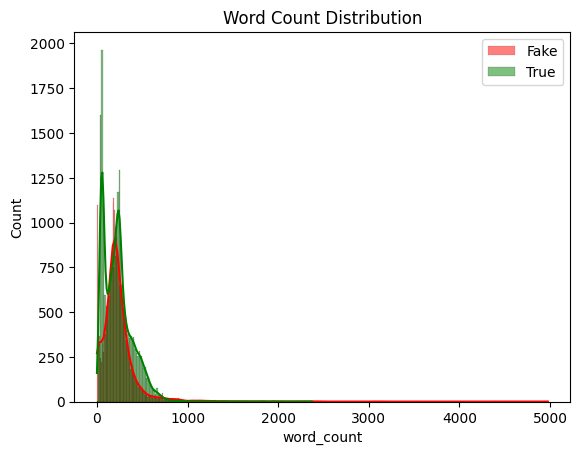

In [20]:
## Word Count Distribution
data["word_count"] = data["clean_content"].apply(lambda x: len(x.split()))

sns.histplot(data[data["label"]==0]["word_count"], color="red", label="Fake", kde=True)
sns.histplot(data[data["label"]==1]["word_count"], color="green", label="True", kde=True)
plt.legend()
plt.title("Word Count Distribution")
plt.show()


In [21]:
from collections import Counter

fake_words = " ".join(data[data["label"]==0]["clean_content"]).split()
true_words = " ".join(data[data["label"]==1]["clean_content"]).split()

fake_common = Counter(fake_words).most_common(20)
true_common = Counter(true_words).most_common(20)

print("Top 20 Fake News Words:", fake_common)
print("Top 20 True News Words:", true_common)


Top 20 Fake News Words: [('trump', 80106), ('said', 33763), ('president', 28406), ('people', 26678), ('one', 25451), ('u', 24750), ('state', 23667), ('would', 23566), ('clinton', 19866), ('time', 19225), ('year', 19074), ('obama', 18838), ('like', 18668), ('american', 18127), ('donald', 17790), ('republican', 16756), ('say', 15784), ('also', 15420), ('right', 14862), ('news', 14687)]
Top 20 True News Words: [('said', 99062), ('trump', 54730), ('u', 47141), ('state', 37678), ('would', 31605), ('reuters', 28971), ('president', 28726), ('republican', 23007), ('year', 22621), ('government', 19992), ('house', 17029), ('new', 16917), ('also', 15954), ('united', 15590), ('people', 15356), ('party', 15294), ('election', 14755), ('official', 14620), ('told', 14245), ('country', 14161)]


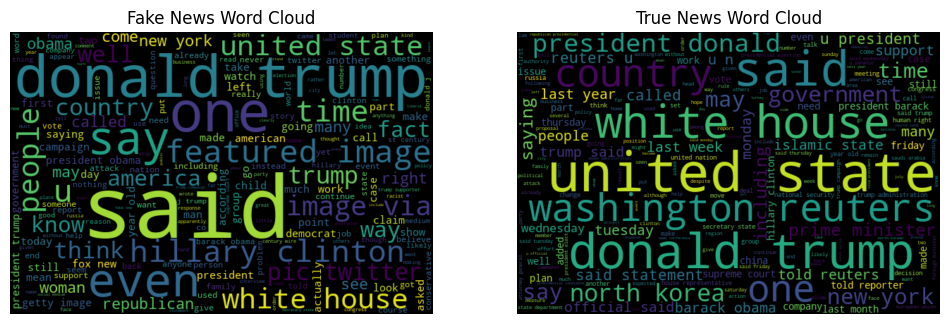

In [24]:
from wordcloud import WordCloud

fake_wc = WordCloud(width=600, height=400, background_color="black").generate(" ".join(fake_words))
true_wc = WordCloud(width=600, height=400, background_color="black").generate(" ".join(true_words))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(fake_wc, interpolation="bilinear")
plt.title("Fake News Word Cloud")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(true_wc, interpolation="bilinear")
plt.title("True News Word Cloud")
plt.axis("off")
plt.show()


## 5. Feature Extraction

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Features (X) and Labels (y)
X = data["clean_content"]
y = data["label"]

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # limit features for performance
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF Shape (Train):", X_train_tfidf.shape)
print("TF-IDF Shape (Test):", X_test_tfidf.shape)


TF-IDF Shape (Train): (35918, 5000)
TF-IDF Shape (Test): (8980, 5000)


## 6. Model Building

In [26]:
from sklearn.naive_bayes import MultinomialNB

# Train Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = nb_model.predict(X_test_tfidf)


## 7. Model Evaluation

Accuracy: 0.9326280623608018

Classification Report:

              precision    recall  f1-score   support

        Fake       0.93      0.94      0.94      4691
        True       0.94      0.92      0.93      4289

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



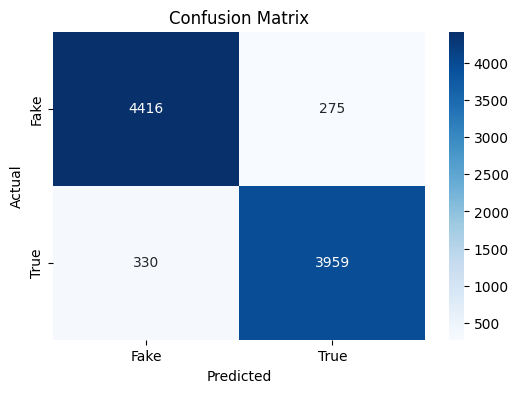

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Fake", "True"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake","True"], yticklabels=["Fake","True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Own Input as Example

In [28]:
def predict_news(news_text):
    cleaned = clean_text(news_text)
    vectorized = tfidf.transform([cleaned])
    pred = nb_model.predict(vectorized)[0]
    return "True News" if pred==1 else "Fake News"

print(predict_news("Breaking: Government launches new policy for education reforms."))
print(predict_news("Aliens spotted building pyramids on Mars."))

True News
Fake News
